In [1]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.pyplot import cm
import scipy.stats as scs 
#import statsmodels.api as sm

%matplotlib inline

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  BaggingRegressor 
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from xgboost import XGBRegressor

In [3]:
#read the pre-processed dataset 
df_house = pd.read_csv('melb_data_new.csv')

In [5]:
#df_house['Date'] = pd.to_datetime(df_house['Date'])
#df_house['Month'] = df_house['Date'].dt.month

In [4]:
df_house['Date']= pd.to_datetime(df_house['Date'])

In [21]:
df_house['Month'] = df_house['Date'].dt.month
df_house['Year'] = df_house['Date'].dt.year

In [22]:
df_house.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,CouncilArea1,Lattitude,Longtitude,Regionname,Propertycount,yearMonth,Month,Year
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,...,1,202,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,201603,3,2016
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,...,1,156,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,201604,4,2016


In [12]:
df_house['yearMonth'] =df_house.Date.apply(lambda x: pd.to_datetime(x).strftime('%Y%m'))

In [13]:
df_house.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea1,Lattitude,Longtitude,Regionname,Propertycount,yearMonth
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-03-12,2.5,3067,2,1,1,202,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,201603
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-04-02,2.5,3067,2,1,1,156,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,201604


In [23]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13580 non-null  int64         
 13  Landsize       13580 non-null  int64         
 14  CouncilArea1   13580 non-null  object        
 15  Lattitude      1358

In [24]:
df_house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13580.0,1.713402e+00,0.859637,1.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
Lattitude,13580.0,-3.780920e+01,0.079260,-38.18255,-37.856822,-37.802355,-3.775640e+01,-3.740853e+01
Longtitude,13580.0,1.449952e+02,0.103916,144.43181,144.929600,145.000100,1.450583e+02,1.455264e+02


<AxesSubplot:xlabel='Price', ylabel='Count'>

Text(0.5, 1.0, 'distribution of property prices in Melbourne')

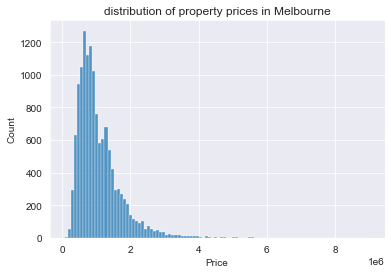

In [40]:
# Price distributions for all properties in Melbourne

#fig, axs = plt.subplots(figsize=(12,8))
sns.histplot(df_house['Price'],bins = 100)
plt.title("distribution of property prices in Melbourne")

### OUTLIER

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Price'>

Text(0, 0.5, 'Counts')

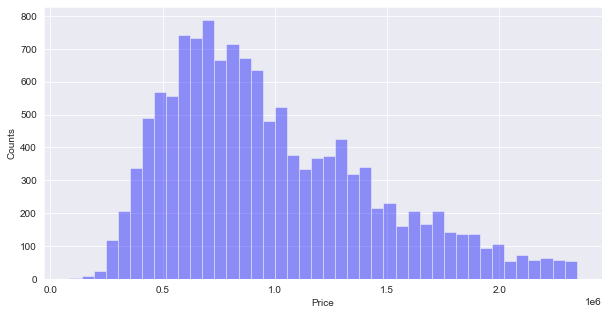

In [51]:
priceQ1 = df_house['Price'].quantile(0.25)
priceQ3 = df_house['Price'].quantile(0.75)
priceIQR = priceQ3-priceQ1
price_Lower_Whisker = priceQ1 - 1.5*priceIQR
price_Upper_Whisker = priceQ3 + 1.5*priceIQR
df_house = df_house[(df_house['Price']>price_Lower_Whisker)&(df_house['Price']<price_Upper_Whisker)]
plt.figure(figsize=(10,5))
sns.distplot(df_house['Price'],hist=True, kde=False, color='blue')
plt.ylabel('Counts')

In [54]:
df_house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,12956.0,2.884455,0.927808,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,12956.0,981359.286122,452925.148384,85000.00000,637000.000000,880000.000000,1.270000e+06,2.345000e+06
Distance,12956.0,10.241857,5.945047,0.00000,6.200000,9.400000,1.300000e+01,4.810000e+01
Postcode,12956.0,3103.913168,92.079365,3000.00000,3044.000000,3081.000000,3.147000e+03,3.977000e+03
Bedroom2,12956.0,2.862998,0.939786,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,12956.0,1.486338,0.639047,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,12956.0,1.686169,0.841603,1.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,12956.0,517.115313,1498.205505,0.00000,168.000000,416.000000,6.450000e+02,7.600000e+04
Lattitude,12956.0,-37.807526,0.080122,-38.18255,-37.856113,-37.798740,-3.775370e+01,-3.740853e+01
Longtitude,12956.0,144.993567,0.105535,144.43181,144.926045,144.998225,1.450573e+02,1.455264e+02


In [55]:
uni_val = []
for i in df_house.columns:
    u = df_house[i].nunique()
    uni_val.append(u)
    
pd.DataFrame({"No. of unique values": uni_val}, index=df_house.columns)

,No. of unique values
Suburb,314
Address,12771
Rooms,9
Type,3
Price,1945
Method,5
SellerG,265
Date,58
Distance,202
Postcode,198


## EDA

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'Postcode'}>,
        <AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>],
       [<AxesSubplot:title={'center':'Landsize'}>,
        <AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'Propertycount'}>],
       [<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

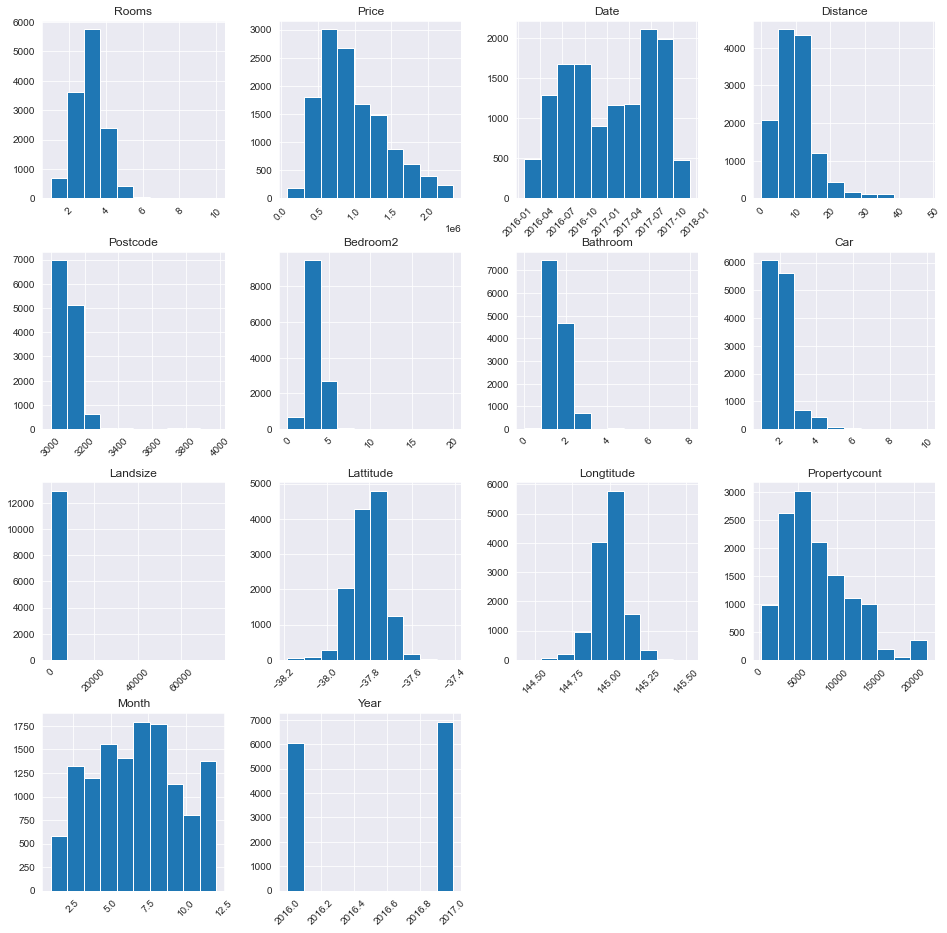

In [56]:
df_house.hist(figsize=(16,16), xrot=45)
plt.show()

<AxesSubplot:xlabel='Regionname', ylabel='Price'>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

Text(0.5, 1.0, 'Regionname VS Price')

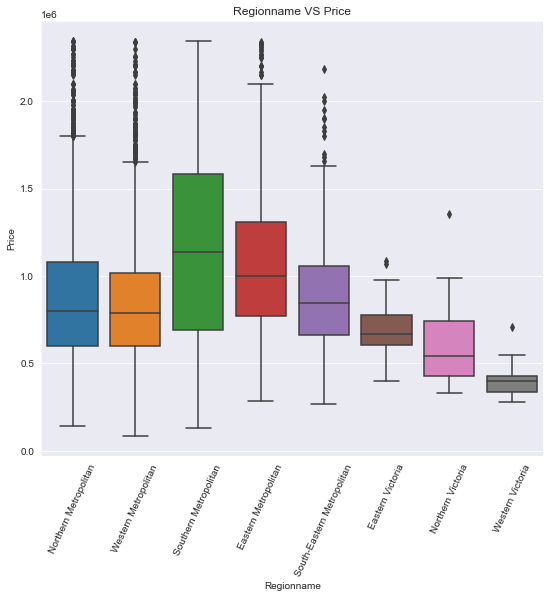

In [53]:
fig, axs = plt.subplots(figsize=(9,8))
sns.boxplot(x='Regionname',y='Price', data = df_house)
plt.xticks(rotation = 65)
plt.title("Regionname VS Price")

<Figure size 648x576 with 0 Axes>

<AxesSubplot:xlabel='Regionname', ylabel='Price'>

Text(0.5, 1.0, 'Violin plot for Regionname to Price')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

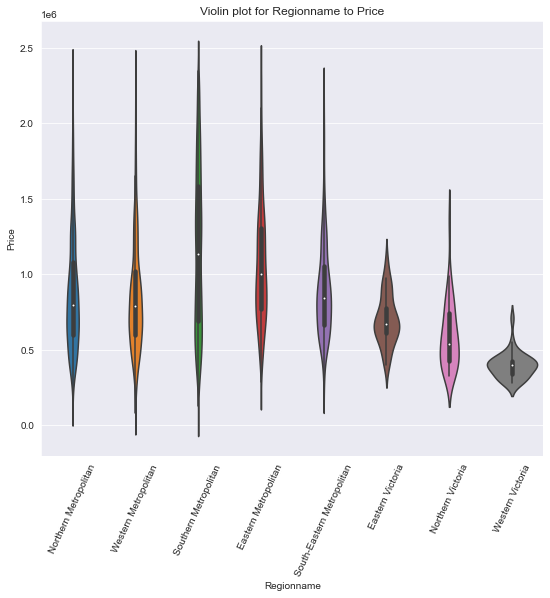

In [60]:
plt.figure(figsize=(9,8), facecolor='w', edgecolor='k')
sns.violinplot(df_house['Regionname'], df_house['Price'])
plt.title("Violin plot for Regionname to Price")
plt.xticks(rotation=65)

<AxesSubplot:xlabel='Type', ylabel='Price'>

Text(0.5, 1.0, 'Type VS Price')

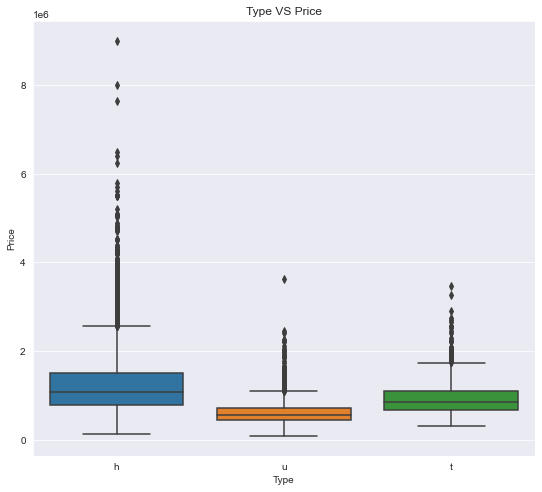

In [49]:
fig, axs = plt.subplots(figsize=(9,8))
sns.boxplot(data = df_house, x = 'Type', y = 'Price')
plt.title("Type VS Price")

<AxesSubplot:xlabel='Method', ylabel='Price'>

Text(0.5, 1.0, 'Method VS Price')

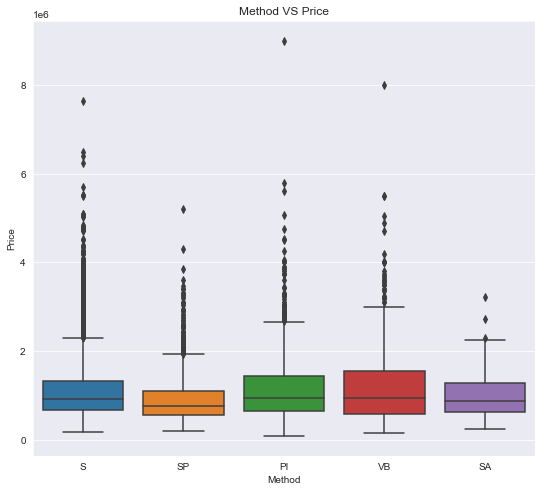

In [43]:
fig, axs = plt.subplots(figsize=(9,8))
sns.boxplot(data = df_house, x = 'Method', y = 'Price')
plt.title("Method VS Price")

In [47]:
# Price distributions for each region

# plt.clf()
# plt.grid(False)
# color=iter(cm.rainbow(np.linspace(0,1,len(group_region))))
# for k in range(len(group_region)):
#   plt.clf()
#   c = next(color)
#   plt.hist(group_region[k][1]['Price'].dropna(),color=c,bins = 100)
#   plt.title("Price of properties in the " +  group_region[k][0] + " area")
#   plt.xlabel("Price")
#   plt.ylabel("Count")
#   plt.show()
  

<AxesSubplot:title={'center':'Average property prices in different regions'}, xlabel='Regionname'>

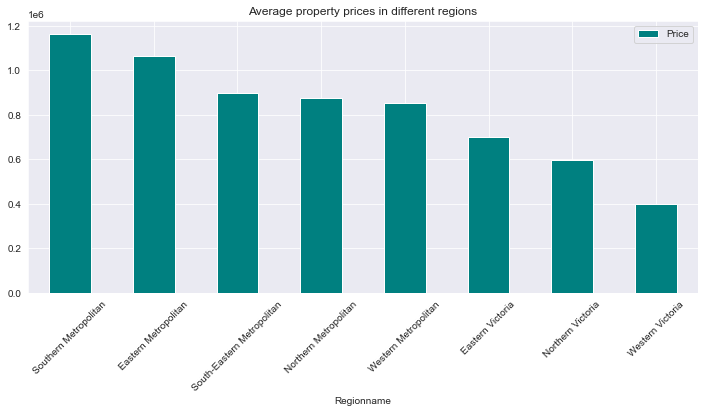

In [57]:
#average property price in each region
df_house[['Regionname','Price']].groupby('Regionname').mean().sort_values(by='Price', 
                                                                    ascending=False).plot.bar(figsize=(12,5), rot=45, color='teal',
                                                                                              title='Average property prices in different regions')

<AxesSubplot:xlabel='Type', ylabel='count'>

Text(0.5, 1.0, 'Types of properties sold in Melbourne')

Text(0.5, 0, 'Property Type ')

Text(0, 0.5, 'Count')

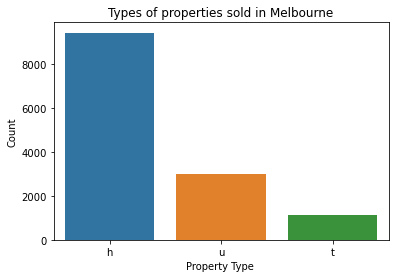

([<matplotlib.patches.Wedge at 0x23ce3775df0>,
 [Text(0.6491997153872743, -0.9187843759778909, 'h'),
  Text(-0.39359036616906795, 1.0539030428169849, 'u'),
  Text(-1.0878474426940914, 0.2867279920480841, 't')],
 [Text(0.3606665085484857, -0.5104357644321615, '69.6%'),
  Text(-0.21866131453837107, 0.5855016904538803, '22.2%'),
  Text(-0.6043596903856061, 0.15929332891560224, '8.2%')])

Text(0.5, 1.0, '% of types of properties sold')

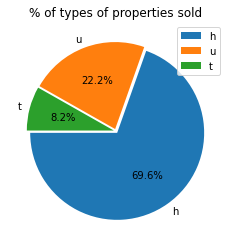

In [55]:
sns.countplot(df_house['Type'])
plt.title("Types of properties sold in Melbourne")
plt.xlabel("Property Type ")
plt.ylabel("Count")
plt.show()

plt.pie(x = df_house.Type.value_counts(),labels=df_house.Type.value_counts().index,
        startangle=180,autopct='%1.1f%%',explode=(0.025,0.025,0.025))
plt.title("% of types of properties sold")
plt.legend()

plt.show()

In [10]:
# overall geo distribution of sold properties in Melbourne
# px.scatter(df_house, x="Longtitude", y="Lattitude", color= 'Regionname')

(array([  2.,  15.,  60., 194., 385., 630., 737., 785., 813., 746., 543.,
        444., 573., 572., 443., 344., 263., 285., 235., 213., 137., 132.,
        109., 102.,  77.,  93.,  63.,  58.,  44.,  34.,  54.,  31.,  33.,
         17.,  25.,  21.,  18.,   9.,   9.,   9.,  12.,   9.,   6.,  12.,
          6.,   3.,   5.,   3.,   1.,   4.,   0.,   3.,   5.,   2.,   0.,
          4.,   2.,   1.,   0.,   0.,   5.,   1.,   1.,   1.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 131000.,  219690.,  308380.,  397070.,  485760.,  574450.,
         663140.,  751830.,  840520.,  929210., 1017900., 1106590.,
        1195280., 1283970., 1372660., 1461350., 1550040., 1638730.,
        1727420., 1816110., 1904800., 1993490., 2082180., 2170870.,
        2259560., 2348250., 2436940., 2525630.

Text(0.5, 1.0, 'Price of properties of type h')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Count')

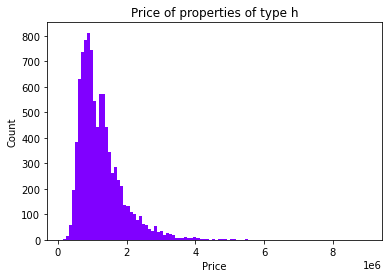

(array([ 3.,  9.,  8., 19., 13., 22., 36., 24., 28., 43., 39., 54., 46.,
        35., 55., 52., 56., 54., 42., 34., 50., 33., 33., 26., 10., 25.,
        13., 15., 26., 25., 12., 16., 11., 14., 16., 10., 10.,  7.,  7.,
         6.,  8.,  8.,  4.,  4.,  7.,  6.,  3.,  1.,  4.,  0.,  3.,  1.,
         4.,  3.,  2.,  2.,  2.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
         0.,  1.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 300000.,  331750.,  363500.,  395250.,  427000.,  458750.,
         490500.,  522250.,  554000.,  585750.,  617500.,  649250.,
         681000.,  712750.,  744500.,  776250.,  808000.,  839750.,
         871500.,  903250.,  935000.,  966750.,  998500., 1030250.,
        1062000., 1093750., 1125500., 1157250., 1189000., 1220750.,
        1252500., 1284250., 1316000., 1347750., 1379500., 1411250.,
        1443000., 1474750.

Text(0.5, 1.0, 'Price of properties of type t')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Count')

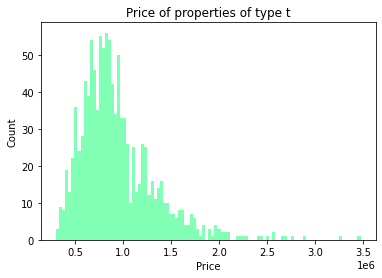

(array([  1.,   1.,   6.,  12.,  33.,  69., 122., 126., 192., 190., 249.,
        218., 207., 200., 211., 183., 152., 143., 112.,  87., 107.,  72.,
         54.,  46.,  24.,  26.,  17.,  13.,  22.,   3.,  12.,  10.,  16.,
          5.,   9.,  10.,   4.,  10.,   3.,   6.,   1.,   2.,   3.,   6.,
          3.,   0.,   1.,   1.,   0.,   1.,   2.,   1.,   1.,   1.,   1.,
          2.,   0.,   1.,   0.,   1.,   0.,   3.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  85000.,  120400.,  155800.,  191200.,  226600.,  262000.,
         297400.,  332800.,  368200.,  403600.,  439000.,  474400.,
         509800.,  545200.,  580600.,  616000.,  651400.,  686800.,
         722200.,  757600.,  793000.,  828400.,  863800.,  899200.,
         934600.,  970000., 1005400., 1040800.

Text(0.5, 1.0, 'Price of properties of type u')

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Count')

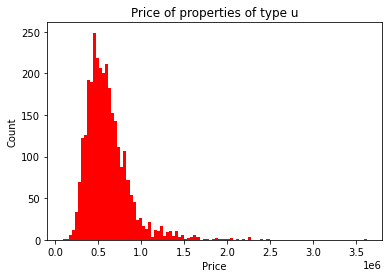

In [56]:
# price distribution of each property type (hourse, townhouse, unit) 

group_type = np.asarray(df_house.groupby(by = "Type"))
plt.clf()
plt.grid(False)
color=iter(cm.rainbow(np.linspace(0,1,len(group_type))))
for k in range(len(group_type)):
    plt.clf()
    c = next(color)
    plt.hist(group_type[k][1]['Price'].dropna(),color=c,bins = 100)
    plt.title("Price of properties of type " +  group_type[k][0])
    plt.xlabel("Price")
    plt.ylabel("Count")
    plt.show()

Text(0.5, 1.0, 'Count of properties sold with different number of rooms')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'No. of rooms')

Text(0.5, 1.0, 'Count of properties sold with different number of carspots')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'No. of carspots')

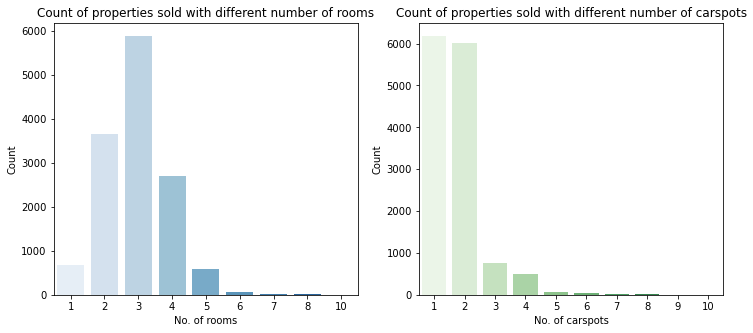

In [61]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
p1 = sns.countplot(x=df_house.Rooms,palette='Blues', ax=ax[0]);
p1.set_title("Count of properties sold with different number of rooms")
p1.set_ylabel("Count")
p1.set_xlabel("No. of rooms")
p2 = sns.countplot(x=df_house.Car,palette='Greens', ax=ax[1]);
p2.set_title("Count of properties sold with different number of carspots")
p2.set_ylabel("Count")
p2.set_xlabel("No. of carspots")
fig.show()

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Distance', ylabel='Price'>

Text(0.5, 1.0, 'Property prices based on distances from City Center')

Text(0.5, 0, 'Distance from CBD')

Text(0, 0.5, 'Price in AUD')

<AxesSubplot:>

<AxesSubplot:xlabel='Distance', ylabel='Count'>

Text(0.5, 1.0, 'Counts of properties sold based On Distance from City Center')

Text(0.5, 0, 'Distance from CBD')

Text(0, 0.5, 'Count')

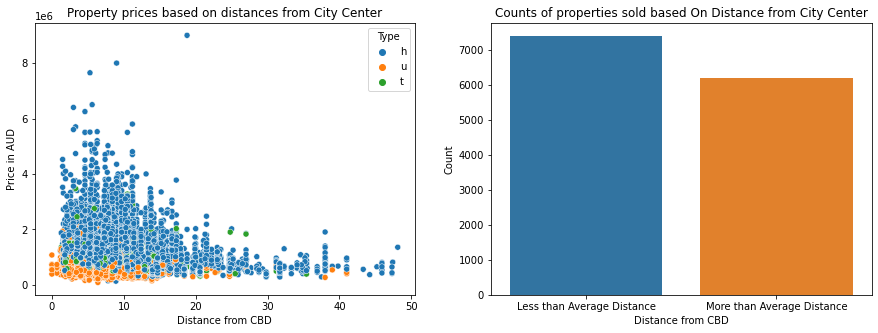

In [62]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x=df_house.Distance,y=df_house.Price,hue=df_house.Type);
plt.title("Property prices based on distances from City Center")
plt.xlabel("Distance from CBD")
plt.ylabel("Price in AUD")

plt.subplot(1,2,2)
dist_mean = df_house.Distance.mean()
dist_less = df_house[df_house["Distance"] < dist_mean].shape[0]
dist_more= df_house[df_house["Distance"] > dist_mean].shape[0]
distance_df = pd.DataFrame({"Distance":["Less than Average Distance","More than Average Distance"], 
                            "Count":[dist_less,dist_more]})
sns.barplot(x=distance_df.Distance, y=distance_df.Count)
plt.title('Counts of properties sold based On Distance from City Center')        
plt.xlabel('Distance from CBD')
plt.ylabel('Count')
plt.show()

<AxesSubplot:title={'center':'average_price of properties sold by top 20 agents'}, xlabel='SellerG'>

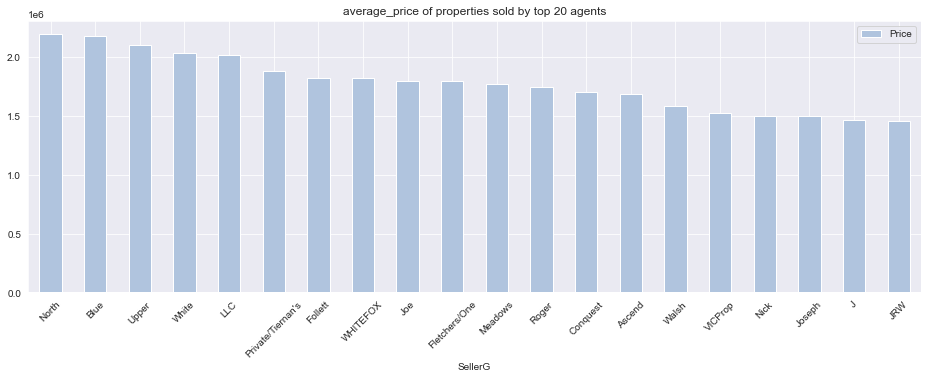

In [58]:
df_house[['SellerG','Price']].groupby('SellerG').mean().sort_values(by='Price', 
                                                                    ascending=False)[0:20].plot.bar(figsize=(16,5), rot=45, color='lightsteelblue',
                                                                                              title='average_price of properties sold by top 20 agents')

<Figure size 864x864 with 0 Axes>

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

Text(0.5, 1.0, 'geo distribution of properties with Price and Landsize')

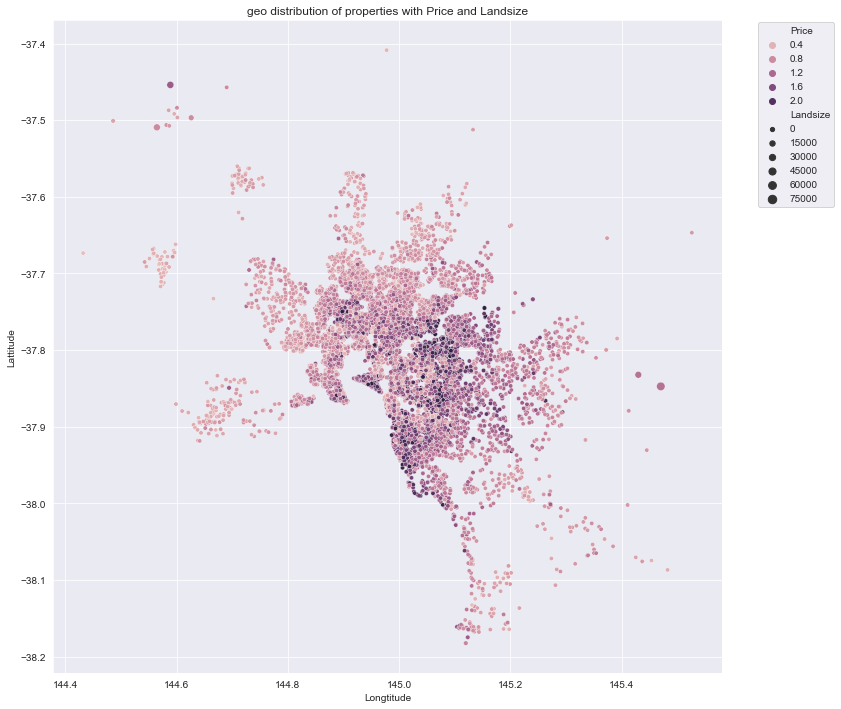

In [63]:
#geo distribution
plt.figure(figsize=(12,12))
sns.scatterplot(df_house["Longtitude"], df_house["Lattitude"], hue=df_house["Price"], size=df_house["Landsize"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.title("geo distribution of properties with Price and Landsize")

<Figure size 864x864 with 0 Axes>

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

Text(0.5, 1.0, 'geo distribution of different types of properties')

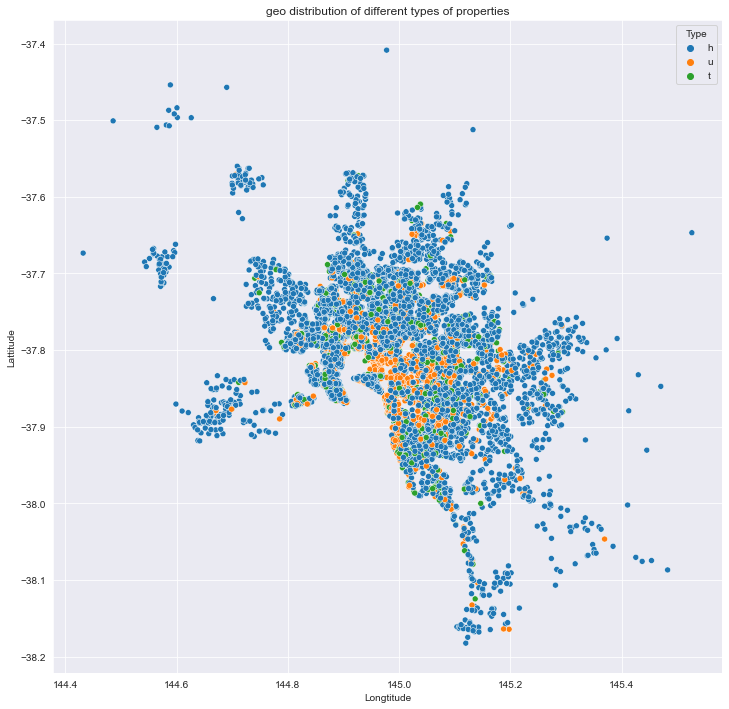

In [66]:
plt.figure(figsize=(12,12), facecolor='w', edgecolor='k')
sns.scatterplot(df_house["Longtitude"], df_house["Lattitude"], hue=df_house["Type"])
plt.title("geo distribution of different types of properties")

<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

Text(0.5, 1.0, 'geo distribution of properties in regions')

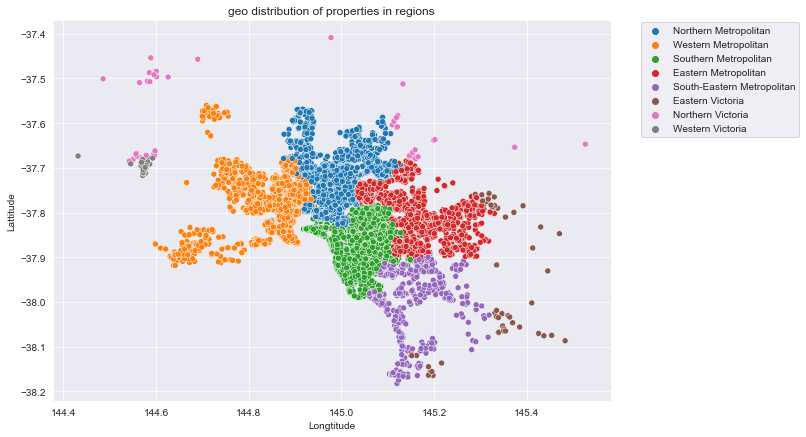

In [67]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(df_house["Longtitude"], df_house["Lattitude"], hue=df_house["Regionname"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.title("geo distribution of properties in regions")


,Suburb,Propertycount
0,Abbotsford,[4019]
1,Aberfeldie,[1543]
2,Airport West,[3464]
3,Albanvale,[1899]
4,Albert Park,[3280]
5,Albion,[2185]
6,Alphington,[2211]
7,Altona,[5301]
8,Altona Meadows,[7630]
9,Altona North,[5132]


([<matplotlib.patches.Wedge at 0x1998fe23e50>,
 [Text(1.0354163618997623, 0.371366338687637, 'Abbotsford'),
  Text(0.7496726124091179, 0.8049788656875959, 'Aberfeldie'),
  Text(0.34686730798228316, 1.0438788582269134, 'Airport West'),
  Text(-0.15210926192417124, 1.0894323165928592, 'Albanvale'),
  Text(-0.6051188613980379, 0.9186028323385151, 'Albert Park'),
  Text(-0.9545854952051686, 0.5465954009538528, 'Albion'),
  Text(-1.0887168349192902, 0.15714850735315006, 'Alphington'),
  Text(-0.9651716423979299, -0.5276776484852118, 'Altona'),
  Text(0.04127377777622548, -1.099225397845264, 'Altona Meadows'),
  Text(0.9953482544468557, -0.4682754022683635, 'Altona North')],
 [Text(0.5647725610362339, 0.2025634574659838, '11.0%'),
  Text(0.408912334041337, 0.4390793812841432, '4.2%'),
  Text(0.18920034980851805, 0.5693884681237709, '9.4%'),
  Text(-0.08296868832227522, 0.5942358090506504, '5.2%'),
  Text(-0.33006483348983884, 0.5010560903664628, '8.9%'),
  Text(-0.5206829973846373, 0.2981429

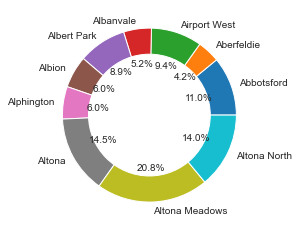

In [68]:
property_count_df = df_house.groupby("Suburb")["Propertycount"].unique().head(10).to_frame().reset_index()
my_circle=plt.Circle( (0,0), 0.7, color='white')
display(property_count_df)

plt.pie(property_count_df["Propertycount"], labels=property_count_df["Suburb"], autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

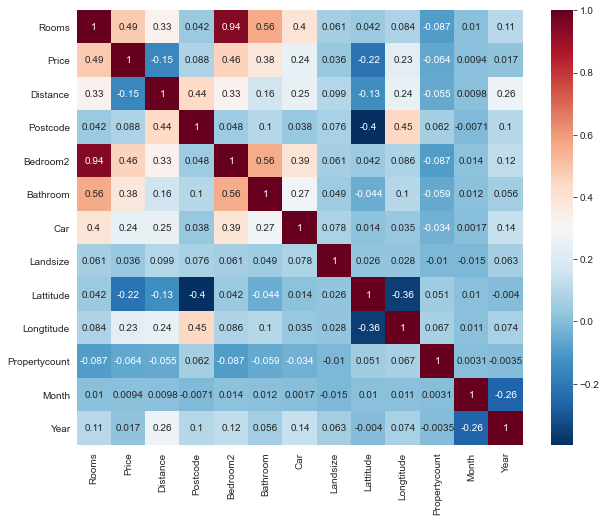

In [71]:
#correlation of the numeric attributes
corrs = df_house.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

`rooms` and `bedrooms2` have 0.94 correlation; "Bedrooms2" will not be used in model building. 

## feature encoding 


In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

In [70]:
df_e = df_house.copy()

In [72]:
# use "label encoding" for "Method","SellerG","CouncilArea1", "regionname"
# use "one-hot encoding" for "type"

cat_features1 = ['Suburb','Method', 'SellerG','CouncilArea1', 'Regionname','yearMonth']


In [73]:
# encoding cat_1
for column in cat_features1:
    
    label_encoder = LabelEncoder()
    
    df_e[column] = label_encoder.fit_transform(df_e[column])

In [74]:
# one hot encoding for "Type"
house_type = pd.get_dummies(df_e['Type'], drop_first=True)
df_e = pd.merge(df_e,house_type, left_index=True, right_index=True)
df_e.drop('Type', axis=1, inplace=True)

In [75]:
df_e.head(2)

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,CouncilArea1,Lattitude,Longtitude,Regionname,Propertycount,yearMonth,Month,Year,t,u
0,0,85 Turner St,2,1480000,1,23,2016-03-12,2.5,3067,2,...,32,-37.7996,144.9984,2,4019,1,3,2016,0,0
1,0,25 Bloomburg St,2,1035000,1,23,2016-04-02,2.5,3067,2,...,32,-37.8079,144.9934,2,4019,2,4,2016,0,0


In [76]:
df_e.drop(['Address', 'Bedroom2','Date','Lattitude','Longtitude'], axis = 1, inplace = True)

In [77]:
X = df_e.drop('Price', axis=1)
Y = df_e['Price']

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12956 entries, 0 to 13579
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         12956 non-null  int32  
 1   Rooms          12956 non-null  int64  
 2   Method         12956 non-null  int32  
 3   SellerG        12956 non-null  int32  
 4   Distance       12956 non-null  float64
 5   Postcode       12956 non-null  int64  
 6   Bathroom       12956 non-null  int64  
 7   Car            12956 non-null  int64  
 8   Landsize       12956 non-null  int64  
 9   CouncilArea1   12956 non-null  int32  
 10  Regionname     12956 non-null  int32  
 11  Propertycount  12956 non-null  int64  
 12  yearMonth      12956 non-null  int32  
 13  Month          12956 non-null  int64  
 14  Year           12956 non-null  int64  
 15  t              12956 non-null  uint8  
 16  u              12956 non-null  uint8  
dtypes: float64(1), int32(6), int64(8), uint8(2)
memory

In [79]:
# from sklearn.preprocessing import MinMaxScaler
# norm = MinMaxScaler().fit(X)
# X_norm = norm.transform(X) 

## dataset spliting: training and testing

In [80]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest,chi2

In [99]:
# def cross_val(model):
#     pred = cross_val_score(model, x_df, y_df, cv = 5, scoring = 'r2')
#     return pred

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)

def Predictive_Model(estimator, train_X, train_y, test_X, test_y):
    estimator.fit(train_X, train_y)
    test_pred = estimator.predict (test_X)
    train_pred = estimator.predict(train_X)
    print ('Training set evaluation: \n ______________________________')
    print_evaluate(train_y, train_pred)
    print('=================================')
    print ('Test set evaluation: \n ______________________________')
    print_evaluate(test_y, test_pred)


In [82]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)
print("Total size: ", df_e.shape[0])
print("Train size: ", x_train.shape, y_train.shape)
print("Test size: ", x_test.shape, y_test.shape)

Total size:  12956
Train size:  (9069, 17) (9069,)
Test size:  (3887, 17) (3887,)


## feature selection 

###  Filter method

In [84]:
# featureK = SelectKBest(chi2,k=6)
# x_train = featureK.fit_transform(x_train,y_train)
# x_test = featureK.transform(x_test)

In [85]:
k = 10
featureK = SelectKBest(chi2, k=k).fit(x_train, y_train)

In [86]:
dfscores = pd.DataFrame(featureK.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['attributes','Score']  #naming the dataframe columns
print(featureScores.nlargest(k,'Score'))  #print k best features
print('--------------------------')
print(featureScores)

       attributes         Score
8        Landsize  5.234148e+06
11  Propertycount  4.385564e+06
0          Suburb  9.176228e+04
3         SellerG  7.724170e+04
9    CouncilArea1  1.203264e+04
4        Distance  6.995293e+03
5        Postcode  5.619767e+03
12      yearMonth  5.302627e+03
16              u  3.063878e+03
10     Regionname  1.966150e+03
--------------------------
       attributes         Score
0          Suburb  9.176228e+04
1           Rooms  1.103545e+03
2          Method  1.215690e+03
3         SellerG  7.724170e+04
4        Distance  6.995293e+03
5        Postcode  5.619767e+03
6        Bathroom  7.452836e+02
7             Car  8.811570e+02
8        Landsize  5.234148e+06
9    CouncilArea1  1.203264e+04
10     Regionname  1.966150e+03
11  Propertycount  4.385564e+06
12      yearMonth  5.302627e+03
13          Month  1.889016e+03
14           Year  2.173877e-01
15              t  1.332411e+03
16              u  3.063878e+03


<Figure size 576x576 with 0 Axes>

<AxesSubplot:>

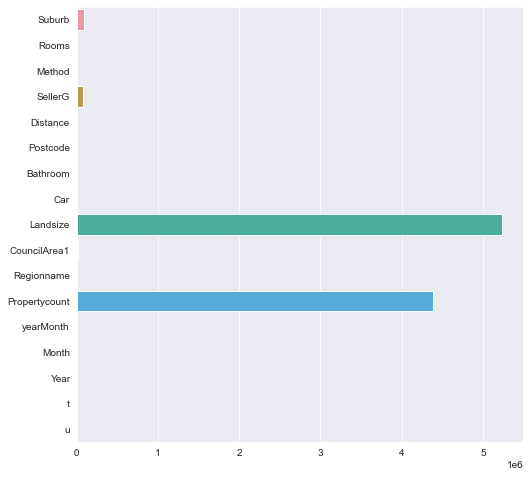

In [90]:
plt.figure(figsize=(8,8))
scores = featureK.scores_
sns.barplot(x=scores, y=x_train.columns)

In [88]:
x_train_2 = featureK.transform(x_train)
x_test_2 = featureK.transform(x_test)

###  Recursive feature elimination 

In [93]:
from sklearn.feature_selection import RFE
# Feature extraction
k=8
rf = RandomForestRegressor()
rfe = RFE(rf, k)
fit = rfe.fit(x_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 8
Selected Features: [False  True False False  True  True  True False  True  True False False
  True False False False  True]
Feature Ranking: [ 5  1  8  3  1  1  1  6  1  1  9  2  1  4 10  7  1]


In [94]:
print(k, 'Chosen best feature by RFE:',x_train.columns[fit.support_])

8 Chosen best feature by RFE: Index(['Rooms', 'Distance', 'Postcode', 'Bathroom', 'Landsize', 'CouncilArea1',
       'yearMonth', 'u'],
      dtype='object')


In [95]:
x_train_3 = rfe.transform(x_train)
x_test_3 = rfe.transform(x_test)

RFECV(estimator=RandomForestRegressor())

Optimal number of features : 15


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Number of features selected')

Text(0, 0.5, 'Cross validation score (nb of correct classifications)')

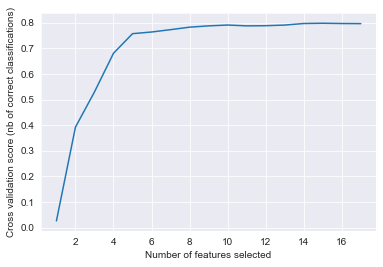

In [96]:
from sklearn.feature_selection import RFECV

# Instantiate RFECV visualizer with a random forest regressor
rfecv = RFECV(RandomForestRegressor())

rfecv.fit(x_train, y_train) # Fit the data to the visualizer

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [97]:
x_train_4 = rfecv.transform(x_train)
x_test_4 = rfecv.transform(x_test)

## models

In [100]:
#linear regression all features
lr = LinearRegression()
Predictive_Model(lr, x_train, y_train, x_test, y_test)

Training set evaluation: 
 ______________________________
MAE: 229290.54190673228
MSE: 91050666030.62248
RMSE: 301746.0290221273
R2 Square: 0.5536431647995571
Test set evaluation: 
 ______________________________
MAE: 231940.91644792663
MSE: 93828115954.32915
RMSE: 306313.7541057031
R2 Square: 0.5482947523168165


In [101]:
#linear regression selected K-features
Predictive_Model(lr, x_train_2 , y_train, x_test_2, y_test)

Training set evaluation: 
 ______________________________
MAE: 273579.36678519065
MSE: 122852403931.05573
RMSE: 350503.0726413903
R2 Square: 0.3977418001863946
Test set evaluation: 
 ______________________________
MAE: 277180.78956547944
MSE: 128505124643.51196
RMSE: 358476.1144672152
R2 Square: 0.3813534614303664


In [102]:
#linear regression rfe
Predictive_Model(lr, x_train_3, y_train, x_test_3, y_test)

Training set evaluation: 
 ______________________________
MAE: 239808.63362974575
MSE: 97942386588.87653
RMSE: 312957.4836761002
R2 Square: 0.5198579470567948
Test set evaluation: 
 ______________________________
MAE: 242577.5891317609
MSE: 101434441603.45381
RMSE: 318487.74168475275
R2 Square: 0.5116765470341996


In [103]:
#linear regression rfecv
Predictive_Model(lr, x_train_4, y_train, x_test_4, y_test)

Training set evaluation: 
 ______________________________
MAE: 229147.40514179764
MSE: 91144713878.79971
RMSE: 301901.8282137419
R2 Square: 0.5531821149061309
Test set evaluation: 
 ______________________________
MAE: 232069.47867683123
MSE: 94017068726.81775
RMSE: 306622.02909578715
R2 Square: 0.5473851000443684


In [104]:
#decision tree all features
dt = DecisionTreeRegressor(max_depth=17, random_state=0)
Predictive_Model(dt, x_train, y_train, x_test, y_test)

Training set evaluation: 
 ______________________________
MAE: 27153.257745692128
MSE: 4004120786.0162754
RMSE: 63278.12249123923
R2 Square: 0.980370635825932
Test set evaluation: 
 ______________________________
MAE: 190862.34275154813
MSE: 76366467767.36673
RMSE: 276344.83488454553
R2 Square: 0.6323582341316674


In [105]:
#decision tree selected K features
Predictive_Model(dt, x_train_2 , y_train, x_test_2, y_test)

Training set evaluation: 
 ______________________________
MAE: 32615.546217867875
MSE: 5832722136.731261
RMSE: 76372.2602567926
R2 Square: 0.9714063003923626
Test set evaluation: 
 ______________________________
MAE: 225079.74369305465
MSE: 104385796837.81664
RMSE: 323087.9088387813
R2 Square: 0.4974681977182246


In [107]:
#decision tree rfe
Predictive_Model(dt, x_train_3 , y_train, x_test_3, y_test)

Training set evaluation: 
 ______________________________
MAE: 27629.138734942633
MSE: 4450219093.662188
RMSE: 66709.9624768459
R2 Square: 0.9781837322318151
Test set evaluation: 
 ______________________________
MAE: 192770.71105937025
MSE: 78349958087.2907
RMSE: 279910.6251775568
R2 Square: 0.6228093587532622


In [108]:
#decision tree rfecv
Predictive_Model(dt, x_train_4 , y_train, x_test_4, y_test)

Training set evaluation: 
 ______________________________
MAE: 27002.88958063657
MSE: 3964751701.5129004
RMSE: 62966.27431818481
R2 Square: 0.9805636345235774
Test set evaluation: 
 ______________________________
MAE: 192019.80821287076
MSE: 77509221678.97318
RMSE: 278404.7802732079
R2 Square: 0.6268568134388084


In [109]:
#random forest all features
rf = RandomForestRegressor(max_leaf_nodes=500, random_state=1)
Predictive_Model(rf, x_train, y_train, x_test, y_test)

Training set evaluation: 
 ______________________________
MAE: 104478.14132603972
MSE: 18190915255.39928
RMSE: 134873.70112590253
R2 Square: 0.9108228449414235
Test set evaluation: 
 ______________________________
MAE: 148650.06837989157
MSE: 43933561085.49918
RMSE: 209603.34225746302
R2 Square: 0.7884960185986336


RandomForestRegressor(max_leaf_nodes=500, random_state=1)

<AxesSubplot:>

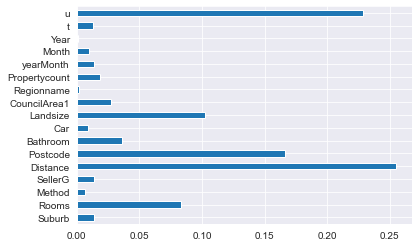

In [110]:
rf.fit(x_train, y_train)
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.plot(kind='barh')
plt.show()

In [111]:
#random forest selected K features
Predictive_Model(rf, x_train_2 , y_train, x_test_2, y_test)

Training set evaluation: 
 ______________________________
MAE: 125815.12698359799
MSE: 27093671707.586945
RMSE: 164601.5543899478
R2 Square: 0.8671789445967262
Test set evaluation: 
 ______________________________
MAE: 169467.73284744646
MSE: 56655174419.72557
RMSE: 238023.4745140184
R2 Square: 0.7272519080927433


In [112]:
#random forest rfe
Predictive_Model(rf, x_train_3, y_train, x_test_3, y_test)

Training set evaluation: 
 ______________________________
MAE: 110072.2649703327
MSE: 20595852946.638115
RMSE: 143512.55327196335
R2 Square: 0.8990331412136705
Test set evaluation: 
 ______________________________
MAE: 151928.37684949196
MSE: 46023983838.88683
RMSE: 214532.011221838
R2 Square: 0.7784323514560348


In [113]:
#random forest rfecv
Predictive_Model(rf, x_train_4, y_train, x_test_4, y_test)

Training set evaluation: 
 ______________________________
MAE: 104417.15063264714
MSE: 18182249286.91416
RMSE: 134841.57106365293
R2 Square: 0.9108653280383145
Test set evaluation: 
 ______________________________
MAE: 148775.9592807996
MSE: 44025171807.85562
RMSE: 209821.76199778618
R2 Square: 0.788054988278334


In [114]:
#Gradient Boosting all features
GBR = GradientBoostingRegressor(n_estimators=300, random_state=1)
Predictive_Model(GBR, x_train, y_train, x_test, y_test)

Training set evaluation: 
 ______________________________
MAE: 131008.44787814825
MSE: 32364913914.468987
RMSE: 179902.51225168866
R2 Square: 0.8413377828390786
Test set evaluation: 
 ______________________________
MAE: 146467.98209156757
MSE: 41474799100.512276
RMSE: 203653.6253065785
R2 Square: 0.8003329363511238


In [115]:
#Gradient Boosting selected K features
Predictive_Model(GBR, x_train_2 , y_train, x_test_2, y_test)

Training set evaluation: 
 ______________________________
MAE: 158005.57469686642
MSE: 48037856257.63833
RMSE: 219175.40066722434
R2 Square: 0.7645044630232383
Test set evaluation: 
 ______________________________
MAE: 172030.8399810152
MSE: 57720126064.96036
RMSE: 240250.13228916307
R2 Square: 0.7221250413557458


In [116]:
#Gradient Boosting rfe
Predictive_Model(GBR, x_train_3 , y_train, x_test_3, y_test)

Training set evaluation: 
 ______________________________
MAE: 137332.97412395658
MSE: 36097768609.13865
RMSE: 189994.12782804275
R2 Square: 0.8230382439074744
Test set evaluation: 
 ______________________________
MAE: 151228.4203642052
MSE: 44690457616.351494
RMSE: 211401.17695119744
R2 Square: 0.7848521840031952


In [117]:
#Gradient Boosting rfecv
Predictive_Model(GBR, x_train_4 , y_train, x_test_4, y_test)

Training set evaluation: 
 ______________________________
MAE: 131063.08274695421
MSE: 32341926180.49431
RMSE: 179838.61148400337
R2 Square: 0.8414504753940338
Test set evaluation: 
 ______________________________
MAE: 147391.97839425533
MSE: 41840616602.23861
RMSE: 204549.79003225255
R2 Square: 0.7985718257976031


In [118]:
#XGBoost all features

XGBR = XGBRegressor()
Predictive_Model(XGBR, x_train, y_train, x_test, y_test)

Training set evaluation: 
 ______________________________
MAE: 80330.22542796891
MSE: 12429599258.976841
RMSE: 111488.11263527983
R2 Square: 0.9390664908900201
Test set evaluation: 
 ______________________________
MAE: 143244.09154513443
MSE: 41346070389.9365
RMSE: 203337.33152064454
R2 Square: 0.8009526592721603


In [119]:
#XGBoost selected K features
Predictive_Model(XGBR, x_train_2 , y_train, x_test_2, y_test)

Training set evaluation: 
 ______________________________
MAE: 109440.45394165564
MSE: 23518059921.159973
RMSE: 153355.9908225302
R2 Square: 0.8847076330783478
Test set evaluation: 
 ______________________________
MAE: 170073.0592037561
MSE: 57419820420.21136
RMSE: 239624.33186179437
R2 Square: 0.7235707661714081


In [120]:
#XGBoost rfe
Predictive_Model(XGBR, x_train_3, y_train, x_test_3, y_test)

Training set evaluation: 
 ______________________________
MAE: 94844.31040322802
MSE: 17275554058.186676
RMSE: 131436.50200072533
R2 Square: 0.9153102116446576
Test set evaluation: 
 ______________________________
MAE: 145921.29360086506
MSE: 42588569233.60688
RMSE: 206369.98142561063
R2 Square: 0.7949710487259208


In [121]:
#XGBoost rfecv
Predictive_Model(XGBR, x_train_4, y_train, x_test_4, y_test)

Training set evaluation: 
 ______________________________
MAE: 79646.54359804002
MSE: 12099511378.247692
RMSE: 109997.77896961235
R2 Square: 0.9406846776447522
Test set evaluation: 
 ______________________________
MAE: 142774.49125892398
MSE: 40902600520.16957
RMSE: 202243.9134317015
R2 Square: 0.8030876021443012


### not updated yet

In [55]:
# regressor = ['Linear Regression', 'Decision Tree','Random Forest', 'Ridge Regression',
#              'Bagging', 'Gradient Boosting', 'XGBoosting']
# models = [LinearRegression(), DecisionTreeRegressor(max_depth=17, random_state=0), 
#           RandomForestRegressor(max_leaf_nodes=500, random_state=1),Ridge(alpha=10),BaggingRegressor(), 
#          GradientBoostingRegressor(n_estimators=300, random_state=1), XGBRegressor()]
# R_squared = []
# MSE = []
# RMSE = []
# for m in models:
#     m.fit(train_X, train_y)
#     prediction_m = m.predict(test_X)
#     r2 = metrics.r2_score(test_y, prediction_m)
#     mse = metrics.mean_squared_error(test_y, prediction_m)
#     rmse = np.sqrt(metrics.mean_squared_error(test_y, prediction_m))
#     R_squared.append(r2)
#     MSE.append(mse)
#     RMSE.append(rmse)
# basic_result = pd.DataFrame({'R squared':R_squared,'MSE': MSE, 'RMSE':RMSE}, index=regressor)
# basic_result

LinearRegression()

DecisionTreeRegressor(max_depth=17, random_state=0)

RandomForestRegressor(max_leaf_nodes=500, random_state=1)

Ridge(alpha=10)

BaggingRegressor()

GradientBoostingRegressor(n_estimators=300, random_state=1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

,R squared,MSE,RMSE
Linear Regression,0.547884,1.857877e+11,431030.927542
Decision Tree,0.622856,1.549795e+11,393674.385997
Random Forest,0.765787,9.624486e+10,310233.553024
Ridge Regression,0.546574,1.863262e+11,431655.132842
Bagging,0.749374,1.029895e+11,320919.761528
Gradient Boosting,0.764844,9.663242e+10,310857.549125
XGBoosting,0.775401,9.229447e+10,303800.050772


In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

In [65]:
# xgbr_model = XGBRegressor() 

# params = {
#     'n_estimators': [110, 120, 130, 140], 
#     'learning_rate': [ 0.05, 0.075, 0.1],
#     'max_depth': [5, 7],
#     'reg_lambda': [0.3, 0.5],
#     #'gamma': [0, 0.5]
# }


# xgb_reg = GridSearchCV(estimator=xgbr_model, param_grid=params, cv=5, n_jobs=-1)

# xgb_reg.fit(x_train, y_train_y)

# xgbr_model_pred = xgb_reg.predict(x_test)

# mse = metrics.mean_squared_error(y_test, xgbr_model_pred)

# r2 = metrics.r2_score(y_test, xgbr_model_pred)

# print("Best score: %0.3f" % xgb_reg.best_score_)
# print("Best parameters set:", xgb_reg.best_params_)
# print("MSE :", mse)
# print ("R_Squred:", r2)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

Best score: 0.803
Best parameters set: {'learning_rate': 0.075, 'max_depth': 7, 'n_estimators': 140, 'reg_lambda': 0.3}
MSE : 86387513895.02306
R_Squred: 0.7897753719986875


In [168]:
# params = {
#     "colsample_bytree": uniform(0.5, 1),
#     "gamma": uniform(0, 1),
#     "learning_rate": uniform(0.01, 0.3), 
#     "max_depth": randint(2, 6),
#     "n_estimators": randint(100, 600), 
#     "subsample": uniform(0.6, 1)
# }

# search = RandomizedSearchCV(xgbr_model, param_distributions=params, random_state=12, n_iter=30, cv=3, 
#                             verbose=1, n_jobs=10, return_train_score=True)

# search.fit(x_train, y_train)

# results = search.cv_results_

# for i in range(1, 5):
#   candidates = np.flatnonzero(results['rank_test_score'] == i)
#   for candidate in candidates:
#       print("Model with rank: {0}".format(i))
#       print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#             results['mean_test_score'][candidate],
#             results['std_test_score'][candidate]))
#       print("Parameters: {0}".format(results['params'][candidate]))